# get metabolism-relevant signatures from MSigDB database
For now, take metabolism terms from KEGG

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import csv

# read data

In [1]:
out_file_path = './'
gene_signature_dir = out_file_path + 'gene_signatures/'

**read in gene signatures from MSigDB**

In [2]:
def read_gene_signatures(fpath):
    res_d = {}
    f = open(fpath, "r")
    t = f.readlines()
    for i in t:
        tt = i.split('\t')
        tt[-1] = tt[-1].replace('\n', '')
        res_d[tt[0]] = tt[2:]
    return res_d

In [3]:
# take only kegg for now
c2_kegg_d = read_gene_signatures(gene_signature_dir + 'c2.cp.kegg.v7.5.1.symbols.gmt')

*choose terms related to metabolism*

In [6]:
kegg_keys = pd.Series(c2_kegg_d.keys())
kegg_keys = list(kegg_keys[(kegg_keys.str.contains('METABOLI')) | (kegg_keys.str.contains('MTOR')) | 
         (kegg_keys.str.contains('OXIDATIVE_PHOSPHORYLATION')) | (kegg_keys.str.contains('TCA')) | 
         (kegg_keys.str.contains('SYNTH')) | (kegg_keys.str.contains('DEGRADA')) | 
         (kegg_keys.str.contains('GLYCOLYSIS')) | (kegg_keys.str.contains('PENTOSE')) |
         (kegg_keys.str.contains('CYCLE')) | (kegg_keys.str.contains('PATHWAY'))])

In [7]:
# remove signaling pathway terms
kegg_remove = ['KEGG_DRUG_METABOLISM_CYTOCHROME_P450',
'KEGG_DRUG_METABOLISM_OTHER_ENZYMES',
'KEGG_PPAR_SIGNALING_PATHWAY',
'KEGG_MAPK_SIGNALING_PATHWAY',
'KEGG_ERBB_SIGNALING_PATHWAY',
'KEGG_CALCIUM_SIGNALING_PATHWAY',
'KEGG_CHEMOKINE_SIGNALING_PATHWAY',
'KEGG_CELL_CYCLE',
'KEGG_P53_SIGNALING_PATHWAY',
'KEGG_WNT_SIGNALING_PATHWAY',
'KEGG_NOTCH_SIGNALING_PATHWAY',
'KEGG_HEDGEHOG_SIGNALING_PATHWAY',
'KEGG_VEGF_SIGNALING_PATHWAY',
'KEGG_TOLL_LIKE_RECEPTOR_SIGNALING_PATHWAY',
'KEGG_NOD_LIKE_RECEPTOR_SIGNALING_PATHWAY',
'KEGG_RIG_I_LIKE_RECEPTOR_SIGNALING_PATHWAY',
'KEGG_CYTOSOLIC_DNA_SENSING_PATHWAY',
'KEGG_T_CELL_RECEPTOR_SIGNALING_PATHWAY',
'KEGG_B_CELL_RECEPTOR_SIGNALING_PATHWAY',
'KEGG_FC_EPSILON_RI_SIGNALING_PATHWAY',
'KEGG_NEUROTROPHIN_SIGNALING_PATHWAY',
'KEGG_GNRH_SIGNALING_PATHWAY',
'KEGG_PATHWAYS_IN_CANCER']

In [8]:
kegg_keys = [i for i in kegg_keys if i not in kegg_remove]

In [9]:
# make dictionary combining all keys
kegg_met = {i: c2_kegg_d[i] for i in kegg_keys}
metabolism_sig = {**kegg_met}

In [10]:
for k,v in metabolism_sig.items():
    print(f'{k}: {len(v)}')

KEGG_N_GLYCAN_BIOSYNTHESIS: 46
KEGG_OTHER_GLYCAN_DEGRADATION: 16
KEGG_O_GLYCAN_BIOSYNTHESIS: 30
KEGG_GLYCOSAMINOGLYCAN_DEGRADATION: 21
KEGG_GLYCOSAMINOGLYCAN_BIOSYNTHESIS_KERATAN_SULFATE: 15
KEGG_GLYCEROLIPID_METABOLISM: 49
KEGG_GLYCOSYLPHOSPHATIDYLINOSITOL_GPI_ANCHOR_BIOSYNTHESIS: 25
KEGG_GLYCEROPHOSPHOLIPID_METABOLISM: 77
KEGG_ETHER_LIPID_METABOLISM: 33
KEGG_ARACHIDONIC_ACID_METABOLISM: 58
KEGG_LINOLEIC_ACID_METABOLISM: 29
KEGG_ALPHA_LINOLENIC_ACID_METABOLISM: 19
KEGG_SPHINGOLIPID_METABOLISM: 39
KEGG_GLYCOSPHINGOLIPID_BIOSYNTHESIS_LACTO_AND_NEOLACTO_SERIES: 26
KEGG_GLYCOSPHINGOLIPID_BIOSYNTHESIS_GLOBO_SERIES: 14
KEGG_GLYCOSPHINGOLIPID_BIOSYNTHESIS_GANGLIO_SERIES: 15
KEGG_RIBOFLAVIN_METABOLISM: 16
KEGG_NICOTINATE_AND_NICOTINAMIDE_METABOLISM: 24
KEGG_PANTOTHENATE_AND_COA_BIOSYNTHESIS: 16
KEGG_AMINOACYL_TRNA_BIOSYNTHESIS: 41
KEGG_GLYCOLYSIS_GLUCONEOGENESIS: 62
KEGG_CITRATE_CYCLE_TCA_CYCLE: 31
KEGG_PENTOSE_PHOSPHATE_PATHWAY: 27
KEGG_PENTOSE_AND_GLUCURONATE_INTERCONVERSIONS: 28
KEGG_FRUCT

In [11]:
len(metabolism_sig.keys())

73

In [12]:
# exmaine similarity of gene signatures
all_d = {}
for key in metabolism_sig:
    d = {}
    for key2 in metabolism_sig:
        if key2 != key:
            overlap_items = [v for v in metabolism_sig[key2] if v in metabolism_sig[key]]
            d[key2] = len(overlap_items) / len(metabolism_sig[key])
        d[key] = 1
    all_d[key] = d
all_d_df = pd.DataFrame(all_d)

<AxesSubplot:>

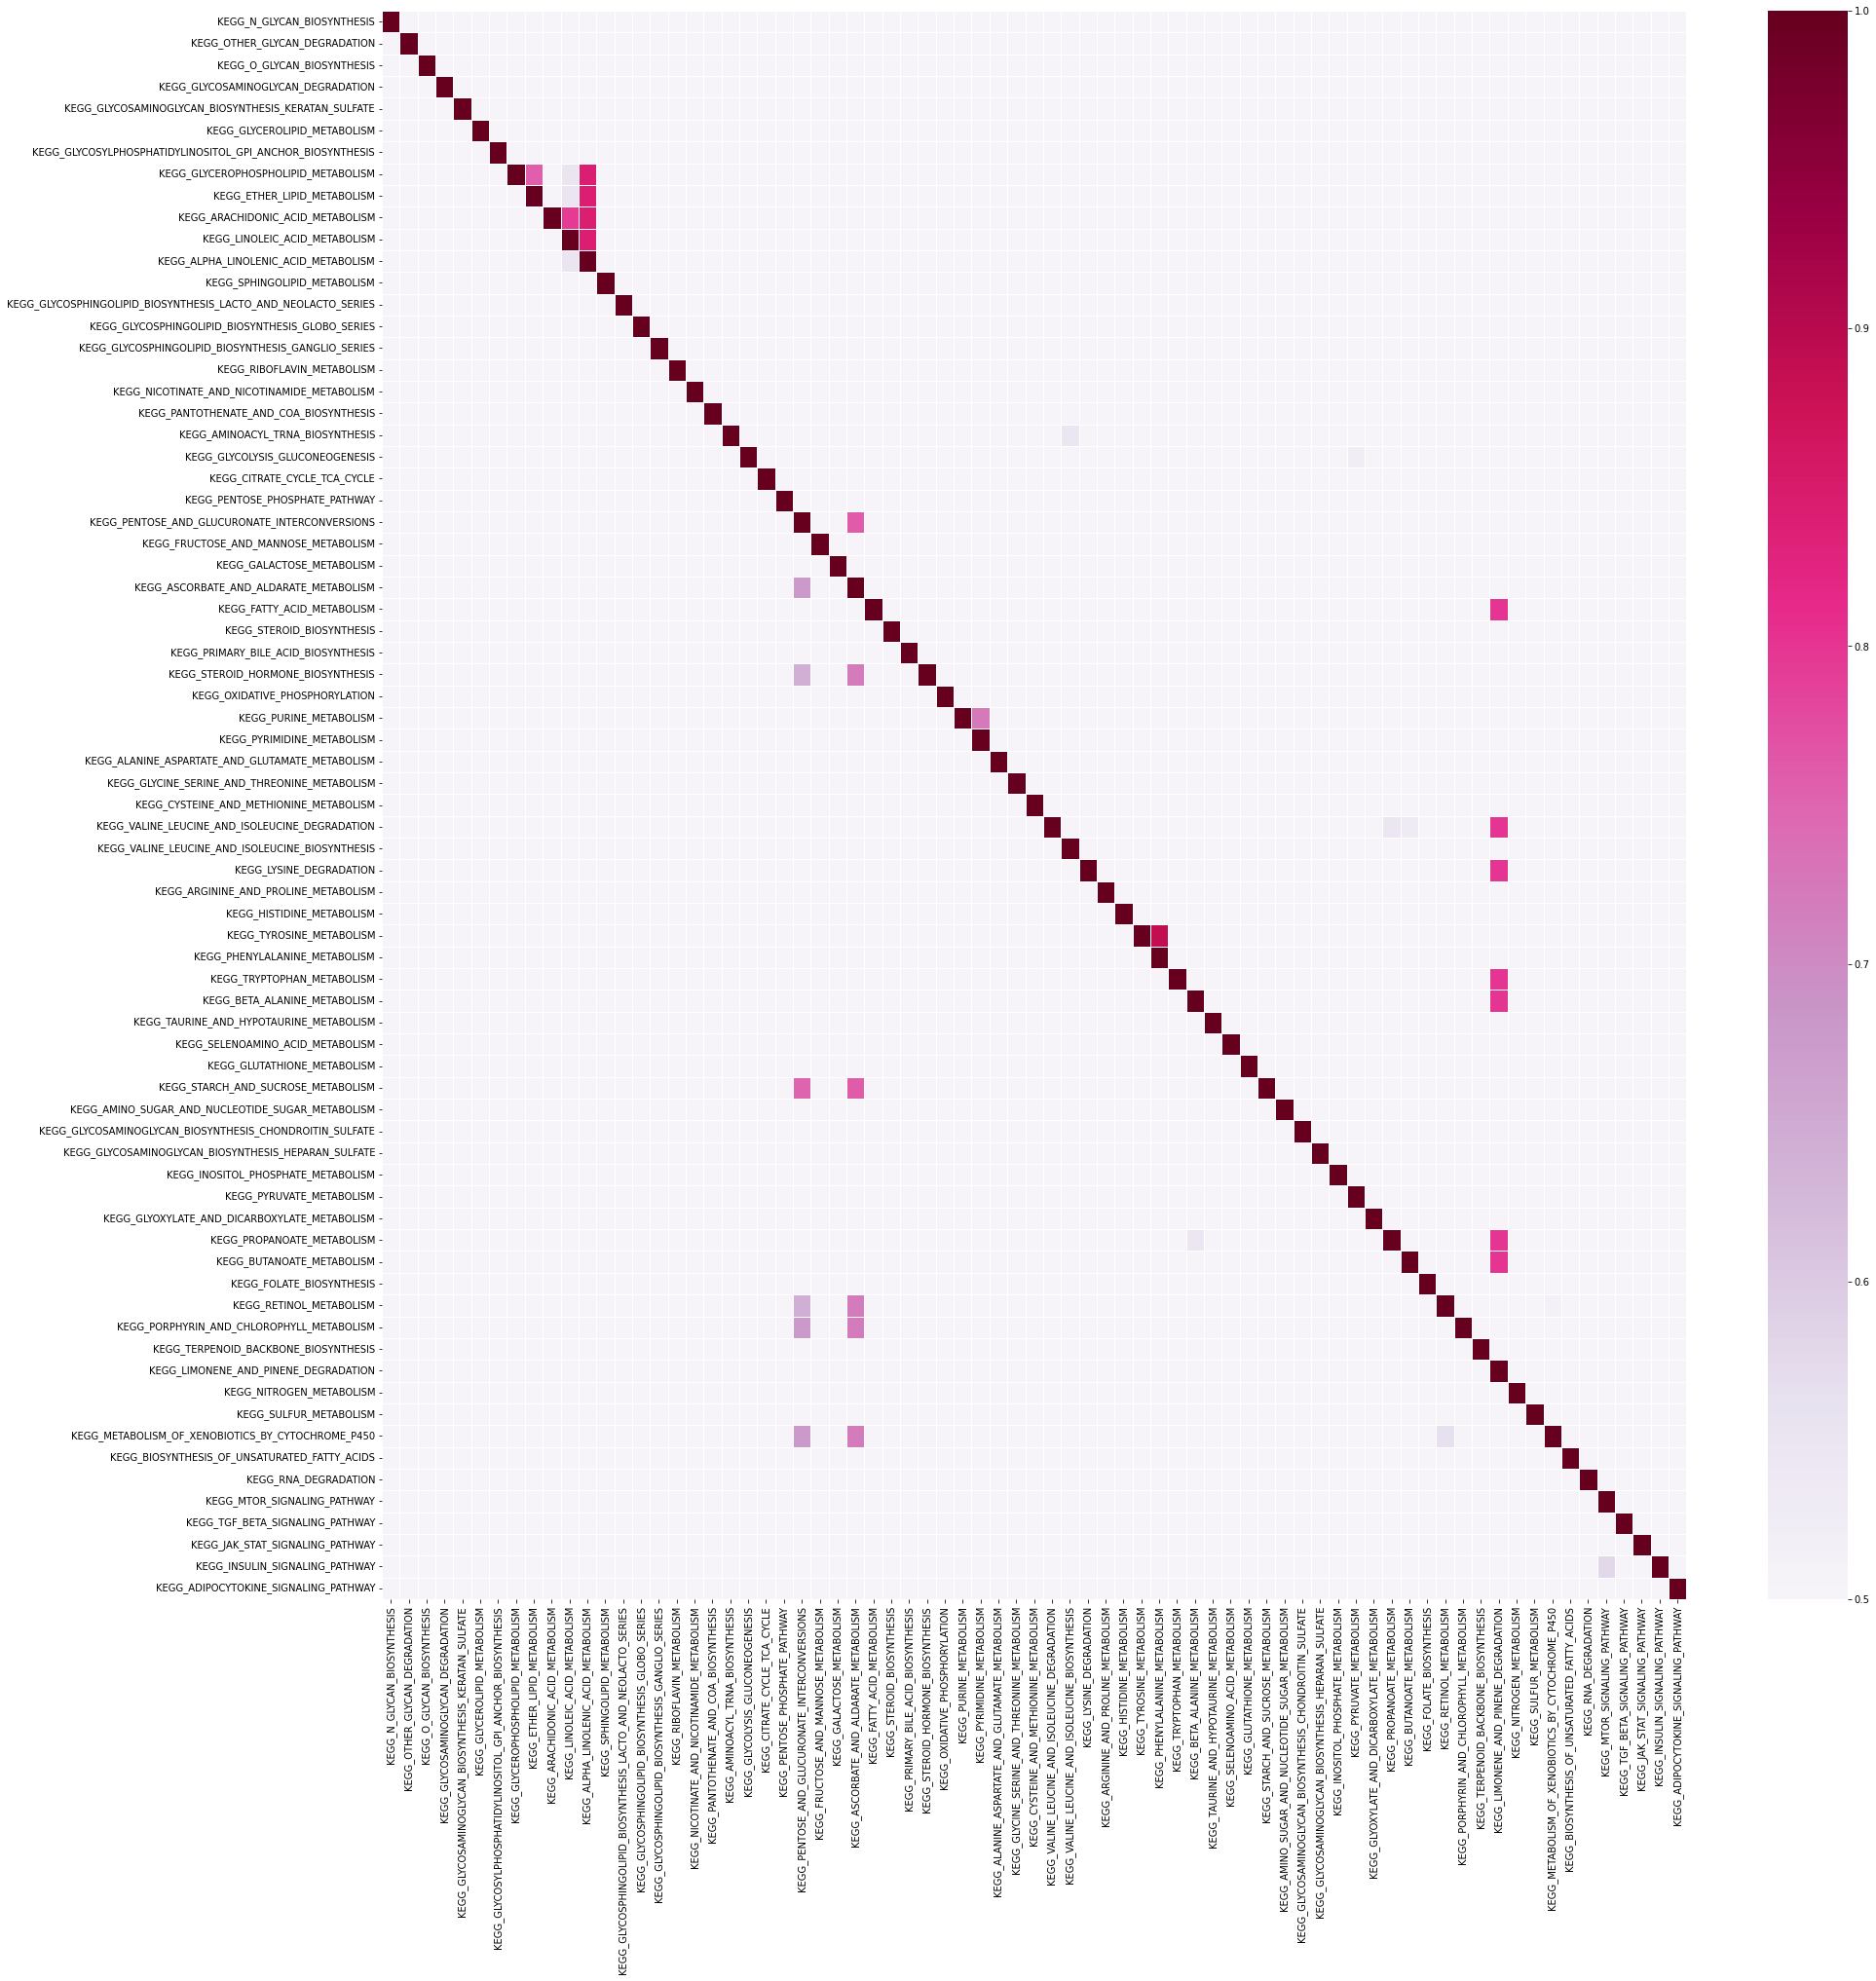

In [17]:
plt.figure(figsize = (30,30))
sns.heatmap(all_d_df, cmap = "PuRd", vmin = 0.5, linewidths = 1)

In [25]:
# save dict of metabolism terms
with open(gene_signature_dir + 'metabolism_terms_msigdb.csv', 'w') as csv_file:
    for key, value in metabolism_sig.items():
        csv_file.write(key)
        for v in value:
            csv_file.write('\t' + v)
        csv_file.write('\n')

In [26]:
out_filename = gene_signature_dir + 'metabolism_terms_msigdb.pickle'
joblib.dump(metabolism_sig, out_filename)

['./gene_signatures/metabolism_terms_msigdb.pickle']